In [20]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import load_model
from keras.utils import to_categorical

In [12]:
# Define the labels
labels = ['PNEUMONIA', 'NORMAL', 'TUBERCULOSIS', 'COVID19']

# Set the image size
img_size = 150

# Function to load the training, test, and validation data
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [13]:
model = load_model(r"C:\Users\ACER\Desktop\Jupyter\Project v2 (PNCT)\Models\Model of Jv2 [95.52% acc] Dataset 5.1, 100 epoch, 16 batch size.h5")

In [44]:
# Method 1 from split file
shenzen = get_training_data(r'C:\Users\ACER\Desktop\Jupyter\Project v2 (PNCT)\Shenzen TB (extracted)\images')

x_shenzen = []
y_shenzen = []
for feature, label in shenzen:
    x_shenzen.append(feature)
    y_shenzen.append(label)

In [29]:
# Method 2 [FIX THIS] from csv file
csv_path = r"C:\Users\ACER\Desktop\Jupyter\Project v2 (PNCT)\Shenzen TB (extracted)\shenzhen_metadata with labels.csv"
data = pd.read_csv(csv_path)

x_shenzen = []
y_shenzen = []
data_folder = r"C:\Users\ACER\Desktop\Jupyter\Project v2 (PNCT)\Shenzen TB (extracted)\resized500"
i = 1
for index, row in data.iterrows():
    file_name = row['study_id']
    label = row['labels']
    # Read and preprocess the image
    image_path = os.path.join(data_folder, file_name)
    image = cv2.imread(image_path)
    # Perform any necessary preprocessing on the image here
    # (e.g., resizing, normalization, etc.)
    # Append the image and label to the respective lists
    x_shenzen.append(image)
    if(label == "NORMAL"):
      y_shenzen.append(1)
    elif(label == "TUBERCULOSIS"):
      y_shenzen.append(2)
    if(i%50 == 0):
       print(i)
       i+=1

In [45]:
y_shenzen

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [46]:
# Actual Test
x_shenzen = np.array(x_shenzen) / 255
x_shenzen = x_shenzen.reshape(-1, img_size, img_size, 1)

In [47]:
y_shenzen = np.array(y_shenzen)
y_shenzen

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
y_shenzen = to_categorical(y_shenzen, num_classes=4)
y_shenzen

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [49]:
prediction = model.predict(x_shenzen)
for i in prediction:
    predicted_class = labels[np.argmax(i)]
    print(np.argmax(i),predicted_class)

21/21 [==============================] - 5s 228ms/step
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
3 COVID19
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
0 PNEUMONIA
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
3 COVID19
3 COVID19
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
0 PNEUMONIA
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
3 COVID19
1 NORMAL
1 NORMAL
1 NORMAL
2 

<Axes: ylabel='count'>

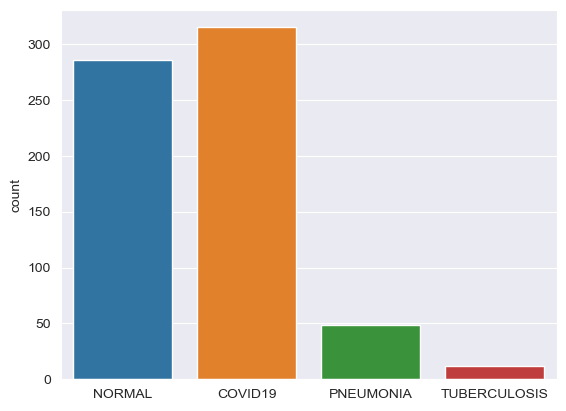

In [50]:
l = []
for i in prediction:
        l.append(labels[np.argmax(i)]) 
sns.set_style('darkgrid')
sns.countplot(x=l)

In [51]:
model.evaluate(x_shenzen,y_shenzen)

21/21 [==============================] - 5s 240ms/step - loss: 3.8375 - accuracy: 0.3293


[3.8374922275543213, 0.32930514216423035]